In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (confusion_matrix, classification_report, plot_roc_curve, roc_auc_score, 
accuracy_score, precision_score, recall_score, f1_score, auc, precision_recall_curve, average_precision_score)
from sklearn.datasets import make_classification
from plot_metric.functions import BinaryClassification
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier

from sklearn.svm import SVC

pd.set_option('display.max_rows', 500)

In [2]:
df_spray = pd.read_csv('spray.csv/spray.csv')
df_test = pd.read_csv('test.csv/test.csv')
df_train = pd.read_csv('train.csv/train.csv')
df_weather = pd.read_csv('weather.csv/weather.csv')

In [3]:
# Checking data size

print(f'The training dataset has {df_train.shape[0]} rows and {df_train.shape[1]} features.')
print(f'The test dataset has {df_test.shape[0]} rows and {df_test.shape[1]} features.')
print(f'The spray dataset has {df_spray.shape[0]} rows and {df_spray.shape[1]} features.')
print(f'The weather dataset has {df_weather.shape[0]} rows and {df_weather.shape[1]} features.')

The training dataset has 10506 rows and 12 features.
The test dataset has 116293 rows and 11 features.
The spray dataset has 14835 rows and 4 features.
The weather dataset has 2944 rows and 22 features.


In [4]:
df_test['Date'].unique()

array(['2008-06-11', '2008-06-17', '2008-06-24', '2008-07-01',
       '2008-07-04', '2008-07-11', '2008-07-14', '2008-07-21',
       '2008-07-23', '2008-07-24', '2008-07-28', '2008-07-29',
       '2008-08-04', '2008-08-05', '2008-08-12', '2008-08-13',
       '2008-08-19', '2008-08-25', '2008-08-26', '2008-09-02',
       '2008-09-03', '2008-09-09', '2008-09-15', '2008-09-19',
       '2008-09-29', '2010-06-02', '2010-06-11', '2010-06-18',
       '2010-06-25', '2010-06-28', '2010-07-01', '2010-07-02',
       '2010-07-12', '2010-07-13', '2010-07-16', '2010-07-19',
       '2010-07-23', '2010-07-26', '2010-07-29', '2010-07-30',
       '2010-08-05', '2010-08-06', '2010-08-13', '2010-08-19',
       '2010-08-20', '2010-08-26', '2010-08-27', '2010-09-02',
       '2010-09-10', '2010-09-13', '2010-09-16', '2010-09-17',
       '2010-09-23', '2010-09-24', '2010-10-01', '2012-06-08',
       '2012-06-15', '2012-06-21', '2012-06-29', '2012-07-09',
       '2012-07-13', '2012-07-19', '2012-07-20', '2012-

In [5]:
df_train['Date'].unique()

array(['2007-05-29', '2007-06-05', '2007-06-26', '2007-06-29',
       '2007-07-02', '2007-07-11', '2007-07-18', '2007-07-19',
       '2007-07-25', '2007-07-27', '2007-08-01', '2007-08-02',
       '2007-08-03', '2007-08-07', '2007-08-08', '2007-08-09',
       '2007-08-15', '2007-08-16', '2007-08-17', '2007-08-21',
       '2007-08-22', '2007-08-24', '2007-08-28', '2007-09-04',
       '2007-09-05', '2007-09-06', '2007-09-12', '2007-09-18',
       '2007-09-19', '2007-09-24', '2007-09-25', '2007-10-04',
       '2007-10-09', '2009-05-28', '2009-06-02', '2009-06-03',
       '2009-06-05', '2009-06-12', '2009-06-15', '2009-06-19',
       '2009-06-22', '2009-06-26', '2009-06-29', '2009-07-06',
       '2009-07-10', '2009-07-13', '2009-07-17', '2009-07-24',
       '2009-07-27', '2009-07-31', '2009-08-07', '2009-08-13',
       '2009-08-25', '2009-08-27', '2009-09-03', '2009-09-14',
       '2009-09-17', '2009-09-25', '2009-10-01', '2011-06-10',
       '2011-06-17', '2011-06-24', '2011-06-30', '2011-

In [6]:
df_train_test = pd.concat([df_train, df_test], axis=0)

In [7]:
df_train_test.columns = df_train_test.columns.map(lambda col: col.lower().replace(' ','_'))
df_train_test.columns

Index(['date', 'address', 'species', 'block', 'street', 'trap',
       'addressnumberandstreet', 'latitude', 'longitude', 'addressaccuracy',
       'nummosquitos', 'wnvpresent', 'id'],
      dtype='object')

In [8]:
# Add Year, Month, Week and Day of Week features
df_train_test['date'] = pd.to_datetime(df_train_test['date'])
df_train_test['year'] = df_train_test['date'].apply(lambda x: x.year)
df_train_test['month'] = df_train_test['date'].apply(lambda x: x.month)
df_train_test['week'] = df_train_test['date'].apply(lambda x: x.week)
df_train_test['dayofweek'] = df_train_test['date'].apply(lambda x: x.dayofweek)

In [9]:
df_weather.columns = df_weather.columns.map(lambda col: col.lower().replace(' ','_'))
df_weather.columns

Index(['station', 'date', 'tmax', 'tmin', 'tavg', 'depart', 'dewpoint',
       'wetbulb', 'heat', 'cool', 'sunrise', 'sunset', 'codesum', 'depth',
       'water1', 'snowfall', 'preciptotal', 'stnpressure', 'sealevel',
       'resultspeed', 'resultdir', 'avgspeed'],
      dtype='object')

In [10]:
# Add Year, Month, Week and Day of Week features
df_weather['date'] = pd.to_datetime(df_weather['date'])
df_weather['year'] = df_weather['date'].apply(lambda x: x.year)
df_weather['month'] = df_weather['date'].apply(lambda x: x.month)
df_weather['week'] = df_weather['date'].apply(lambda x: x.week)
df_weather['dayofweek'] = df_weather['date'].apply(lambda x: x.dayofweek)

In [11]:
df_train_new = df_train_test.iloc[:len(df_train), :]

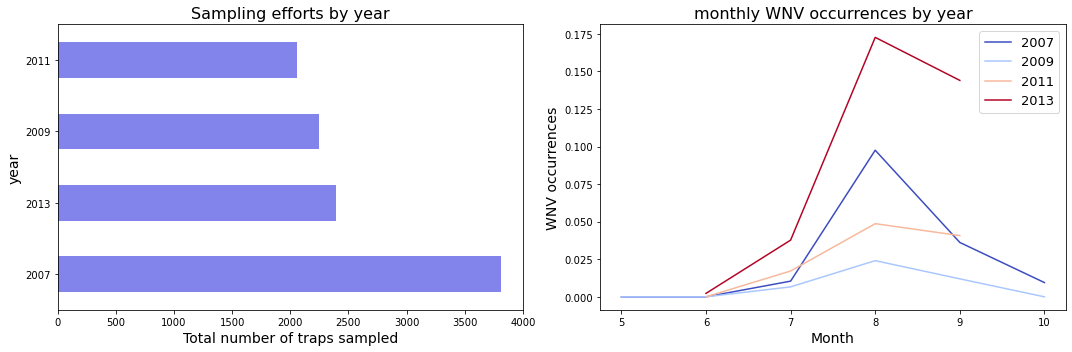

In [12]:
fig, ax = plt.subplots(ncols = 2, figsize=(15,5))

# plot sampling efforts by year
df_train_new['year'].value_counts().plot(kind = 'barh', ax = ax[0], color='#8383EC')
ax[0].set_title('Sampling efforts by year', fontsize=16)
ax[0].set_ylabel('year', fontsize=14)
ax[0].set_xlabel('Total number of traps sampled',fontsize=14)

sns.lineplot(data = df_train_new, x='month', y='wnvpresent', hue='year', ci = None, 
             palette = 'coolwarm', ax = ax[1])
ax[1].legend(fontsize = 13)
ax[1].set_title('monthly WNV occurrences by year', fontsize=16)
ax[1].set_xlabel('Month',fontsize=14)
ax[1].set_ylabel('WNV occurrences',fontsize=14)

plt.tight_layout()

C:\Users\henri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


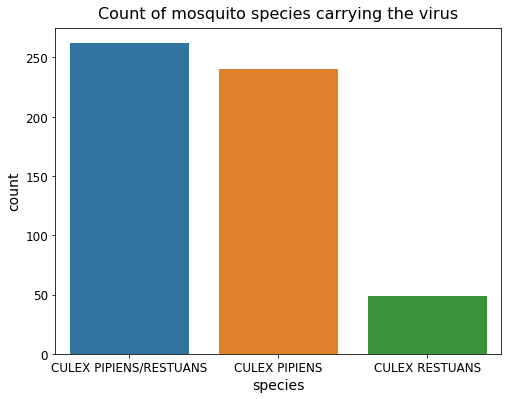

In [13]:
plt.figure(figsize=(8,6))
sns.countplot(df_train_new[df_train_new['wnvpresent']==1]['species'])
plt.title('Count of mosquito species carrying the virus', fontsize=16, y=1.01)
plt.tick_params(labelsize=12)
plt.xlabel('species', fontsize=14)
plt.ylabel('count', fontsize=14)
plt.show()

In [14]:
df_train_test.drop(['id','addressaccuracy','address','street','addressnumberandstreet'],axis=1,inplace=True)

In [15]:
df_weather.isin(['M']).sum()[df_weather.isin(['M']).sum() > 0].sort_values(ascending=False)

water1         2944
depart         1472
depth          1472
snowfall       1472
tavg             11
heat             11
cool             11
sealevel          9
wetbulb           4
stnpressure       4
avgspeed          3
preciptotal       2
dtype: int64

In [16]:
# replace trace and missing precip with 0s
df_weather.preciptotal.replace(['  T','M'],0,inplace=True)
df_weather.preciptotal = df_weather.preciptotal.astype(float)

# check number of rows with missing avg temp
print(df_weather.tavg.value_counts()['M'])

# imputing Tavg manually (increases accuracy)
df_weather.tavg = (df_weather.tmax + df_weather.tmin)/2
df_weather.tavg = df_weather.tavg.astype(float)

11


In [17]:
df_weather.drop(['water1','depart','depth','snowfall','avgspeed','resultspeed','resultdir','sealevel','stnpressure','codesum','heat','cool'],axis=1,inplace=True)

In [18]:
merged_df = pd.merge(df_weather, df_train_test, on=['date', 'year', 'week', 'month', 'dayofweek'])

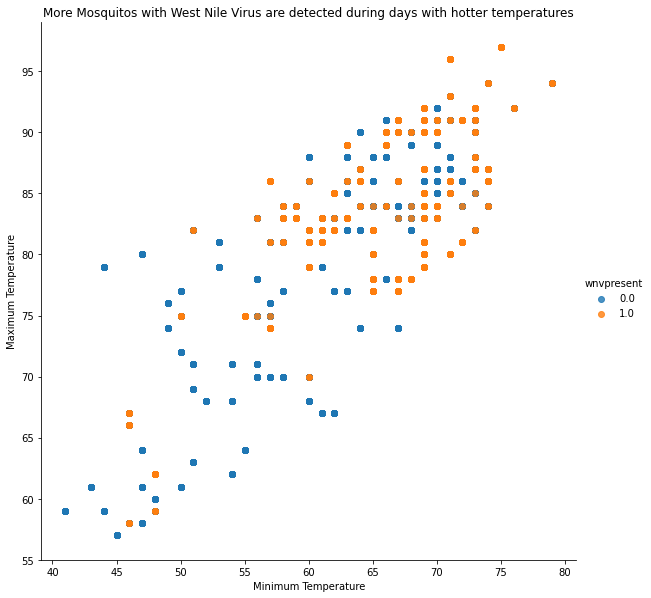

In [19]:
sns.lmplot( x='tmin', y='tmax', data=merged_df, fit_reg=False, hue='wnvpresent', height=8)
plt.title('More Mosquitos with West Nile Virus are detected during days with hotter temperatures')
plt.xlabel('Minimum Temperature')
plt.ylabel('Maximum Temperature');

In [20]:
merged_df['nummosquitos'] = merged_df['nummosquitos'].fillna(0)

In [21]:
merged_df['wnvpresent'] = merged_df['wnvpresent'].fillna(0)

In [22]:
merged_df['species'] = merged_df['species'].map({'CULEX PIPIENS/RESTUANS': 2, 'CULEX PIPIENS': 2, 'CULEX RESTUANS': 1}) \
                                   .fillna(0)

In [23]:
merged_df = pd.get_dummies(merged_df, columns=['trap'])

In [24]:
merged_df.isin(['-']).sum()[merged_df.isin(['-']).sum() > 0].sort_values(ascending=False)

sunrise    126799
sunset     126799
dtype: int64

In [25]:
merged_df['sunrise'] = np.where(merged_df['sunrise'].isin(['-']),0,merged_df['sunrise'])

In [26]:
merged_df['sunset'] = np.where(merged_df['sunset'].isin(['-']),0,merged_df['sunset'])

In [27]:
merged_df['wetbulb'] = np.where(merged_df['sunset'].isin(['-']),0,merged_df['sunset'])

In [28]:
df_train_new = merged_df.iloc[:len(df_train) :]

In [29]:
df_weather_new = merged_df.iloc[:len(df_weather) :]

In [30]:
df_merged_new = pd.concat([df_train_new, df_weather_new], axis=0)

In [31]:
X = df_merged_new.drop(['date','wnvpresent'], axis=1)
y = df_merged_new['wnvpresent']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [33]:
# Baseline
y = df_merged_new['wnvpresent']
y.value_counts(normalize=True)

0.0    0.960892
1.0    0.039108
Name: wnvpresent, dtype: float64

In [34]:
# borderline-SMOTE with SVM for imbalanced dataset
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SVMSMOTE
from matplotlib import pyplot
from numpy import where
# summarize class distribution
counter = Counter(y)
print(counter)
# transform the dataset
oversample = SVMSMOTE()
X, y = oversample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)

Counter({0.0: 12924, 1.0: 526})
Counter({0.0: 12924, 1.0: 12924})


In [35]:
# Instiantiate models
models = {'lr': LogisticRegression(max_iter=5_000, random_state=42, solver='saga'),
          'rf': RandomForestClassifier(random_state=42),
          'gb': GradientBoostingClassifier(random_state=42),
          'dt': DecisionTreeClassifier(random_state=42),
          'et': ExtraTreesClassifier(random_state=42),
          'ada': AdaBoostClassifier(random_state=42),
          'svc': SVC(random_state=42, probability=True),
        }

In [36]:
# Instantiate lists to store results
init_list = []
gs_list = []

# Function to run model -- input scaler and model
def run_model(mod, mod_params={}, grid_search=False):
    
    # Initial dictionary to hold model results
    results = {}
    
    pipe = Pipeline([
            ('ss', StandardScaler()),
            (mod, models[mod])
            ])
    
    if grid_search:
        # Instantiate list to store gridsearch results
        gs = GridSearchCV(pipe, param_grid=mod_params, cv=3, verbose=1, scoring='roc_auc', n_jobs=-1)
        gs.fit(X_train, y_train)
        pipe = gs
        
    else:
        pipe.fit(X_train, y_train)
    
    # Retrieve metrics
    predictions = pipe.predict(X_test)
    tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
    y_test_pred_prob = pipe.predict_proba(X_test)[:,1]
    y_train_pred_prob = pipe.predict_proba(X_train)[:,1]
    
    results['model'] = mod
    results['train_auc'] = roc_auc_score(y_train, y_train_pred_prob)
    results['test_auc'] = roc_auc_score(y_test, y_test_pred_prob)
    results['precision'] = precision_score(y_test, predictions)
    results['specificity'] = tn / (tn + fp)
    results['recall'] = recall_score(y_test, predictions)
    results['f_score'] = f1_score(y_test, predictions)
    
    if grid_search:
        gs_list.append(results)
        print('### BEST PARAMS ###')
        display(pipe.best_params_)
        
    else:
        init_list.append(results)
    
    print('### METRICS ###')
    display(results)
    
    print(f"True Negatives: {tn}")
    print(f"False Positives: {fp}")
    print(f"False Negatives: {fn}")
    print(f"True Positives: {tp}")
    
    return pipe

In [37]:
def evaluation_plot(model,prediction_list,proba_list):
  train_pred,test_pred = prediction_list
  train_proba,test_proba = proba_list
  plt.figure(figsize=(24,12))
  bc = BinaryClassification(y_train, train_proba[::,1], labels=["WNV-", "WNV+"])
  bc1 = BinaryClassification(y_test, test_proba[::,1], labels=["WNV-", "WNV+"])
  #plotting ROC-AUC curve
  plt.subplot2grid(shape=(3,12), loc=(0,0), colspan=3)
  bc.plot_roc_curve(title = 'Training - ROC')
  plt.subplot2grid(shape=(3,12), loc=(0,3), colspan=3)
  bc1.plot_roc_curve(title  = 'Testing - ROC')
  #plotting Precission-recall curve
  plt.subplot2grid((3,12), (1,0), colspan=3)
  bc.plot_precision_recall_curve(title = 'Training - Precision -Recall Curve')
  plt.subplot2grid((3,12), (1,3), colspan=3)
  bc1.plot_precision_recall_curve(title = 'Testing - Precision -Recall Curve')
  #plot confusion matrix
  plt.subplot2grid((3,12), (0,6), colspan=3)
  bc.plot_confusion_matrix(title ='Training')
  plt.subplot2grid((3,12), (0,9), colspan=3)
  bc1.plot_confusion_matrix(title = 'Testing')
  #plot confusion matrix with the values normalized
  plt.subplot2grid((3,12), (1,6), colspan=3)
  bc.plot_confusion_matrix(title ='Training' , normalize = True)
  plt.subplot2grid((3,12), (1,9), colspan=3)
  bc1.plot_confusion_matrix(title = 'Testing', normalize = True)
  #plot class distribution
  plt.subplot2grid((3,12), (2,3), colspan=3)
  bc.plot_class_distribution(title ='Training -Class Distribution')
  plt.subplot2grid((3,12), (2,6), colspan=3)
  bc1.plot_class_distribution(title = 'Testing - Class Distribution')
  plt.show()  
  bc.print_report()

In [38]:
def predictions(pipeline):
    pipeline.fit(X_train.values,y_train.values) #fit pipeline to training data
    a = [pipeline.predict(X_train.values), 
 #      pipeline.predict(X_val.values),
       pipeline.predict(X_test.values)]
    b = [pipeline.predict_proba(X_train.values),
 #      pipeline.predict_proba(X_val.values),
       pipeline.predict_proba(X_test.values)]
    return a,b

In [39]:
lr = run_model('lr')

### METRICS ###


{'model': 'lr',
 'train_auc': 0.9042309545321293,
 'test_auc': 0.8636310209838614,
 'precision': 0.5263157894736842,
 'specificity': 0.9976786174877482,
 'recall': 0.06329113924050633,
 'f_score': 0.11299435028248589}

True Negatives: 3868
False Positives: 9
False Negatives: 148
True Positives: 10


In [40]:
prediction_list,proba_list= predictions(lr)

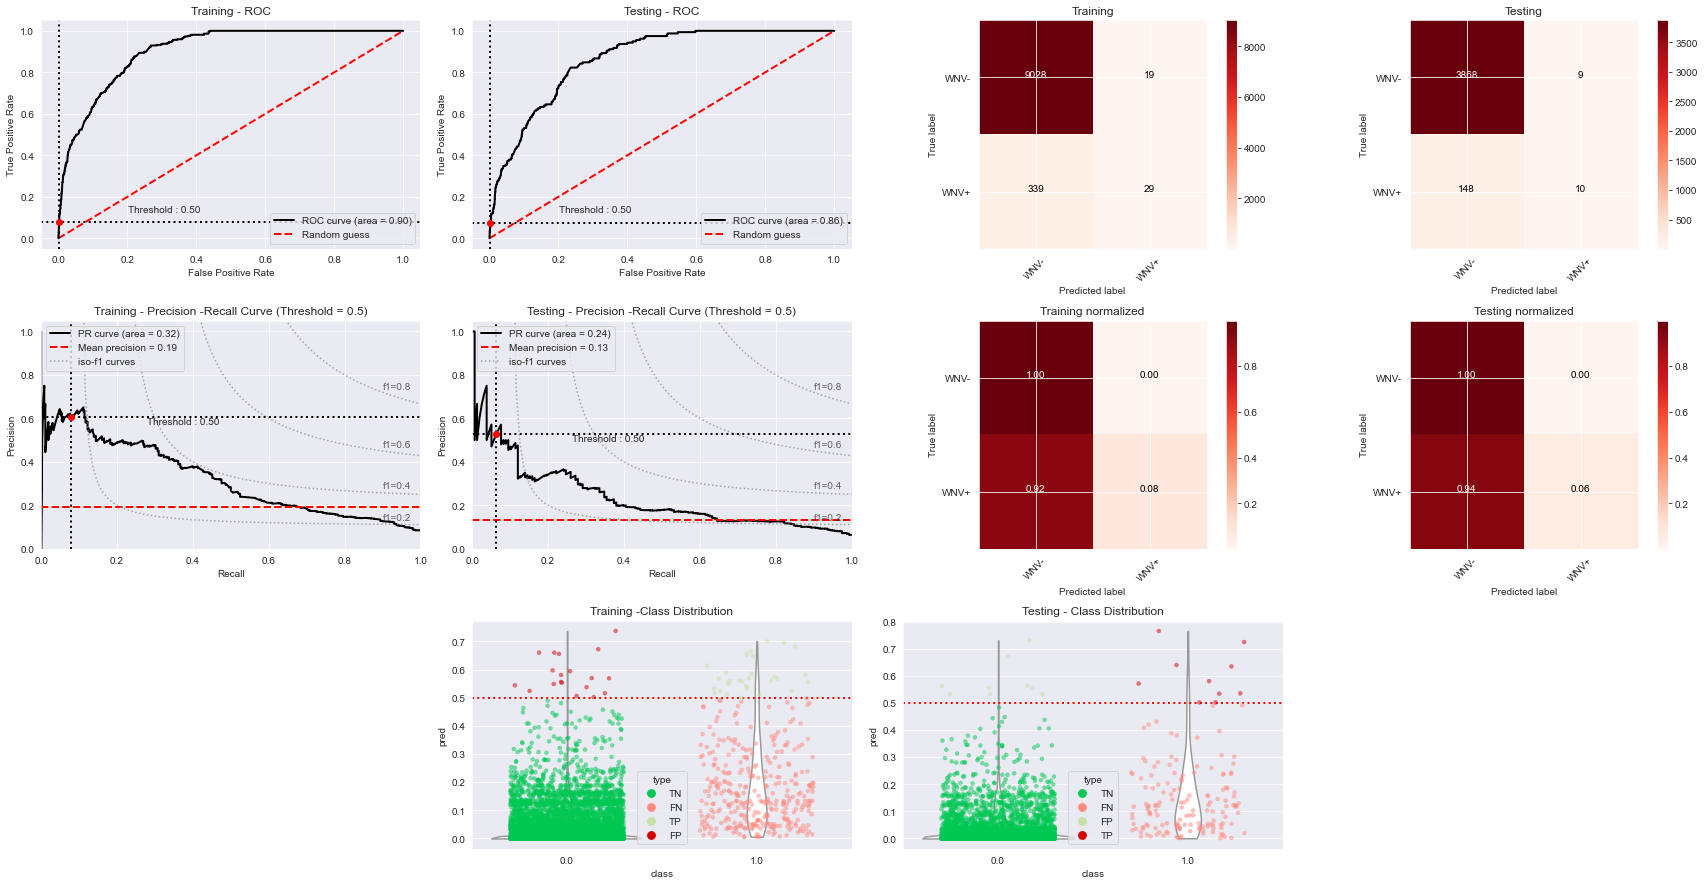

                   ________________________
                  |  Classification Report |
                   ‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾
              precision    recall  f1-score   support

        WNV-       0.96      1.00      0.98      9047
        WNV+       0.60      0.08      0.14       368

    accuracy                           0.96      9415
   macro avg       0.78      0.54      0.56      9415
weighted avg       0.95      0.96      0.95      9415



In [41]:
evaluation_plot(lr, prediction_list,proba_list)

In [42]:
rf = run_model('rf')

### METRICS ###


{'model': 'rf',
 'train_auc': 0.9926766799948098,
 'test_auc': 0.9146483807459114,
 'precision': 0.4857142857142857,
 'specificity': 0.990714469950993,
 'recall': 0.21518987341772153,
 'f_score': 0.2982456140350877}

True Negatives: 3841
False Positives: 36
False Negatives: 124
True Positives: 34


In [43]:
prediction_list,proba_list= predictions(rf)

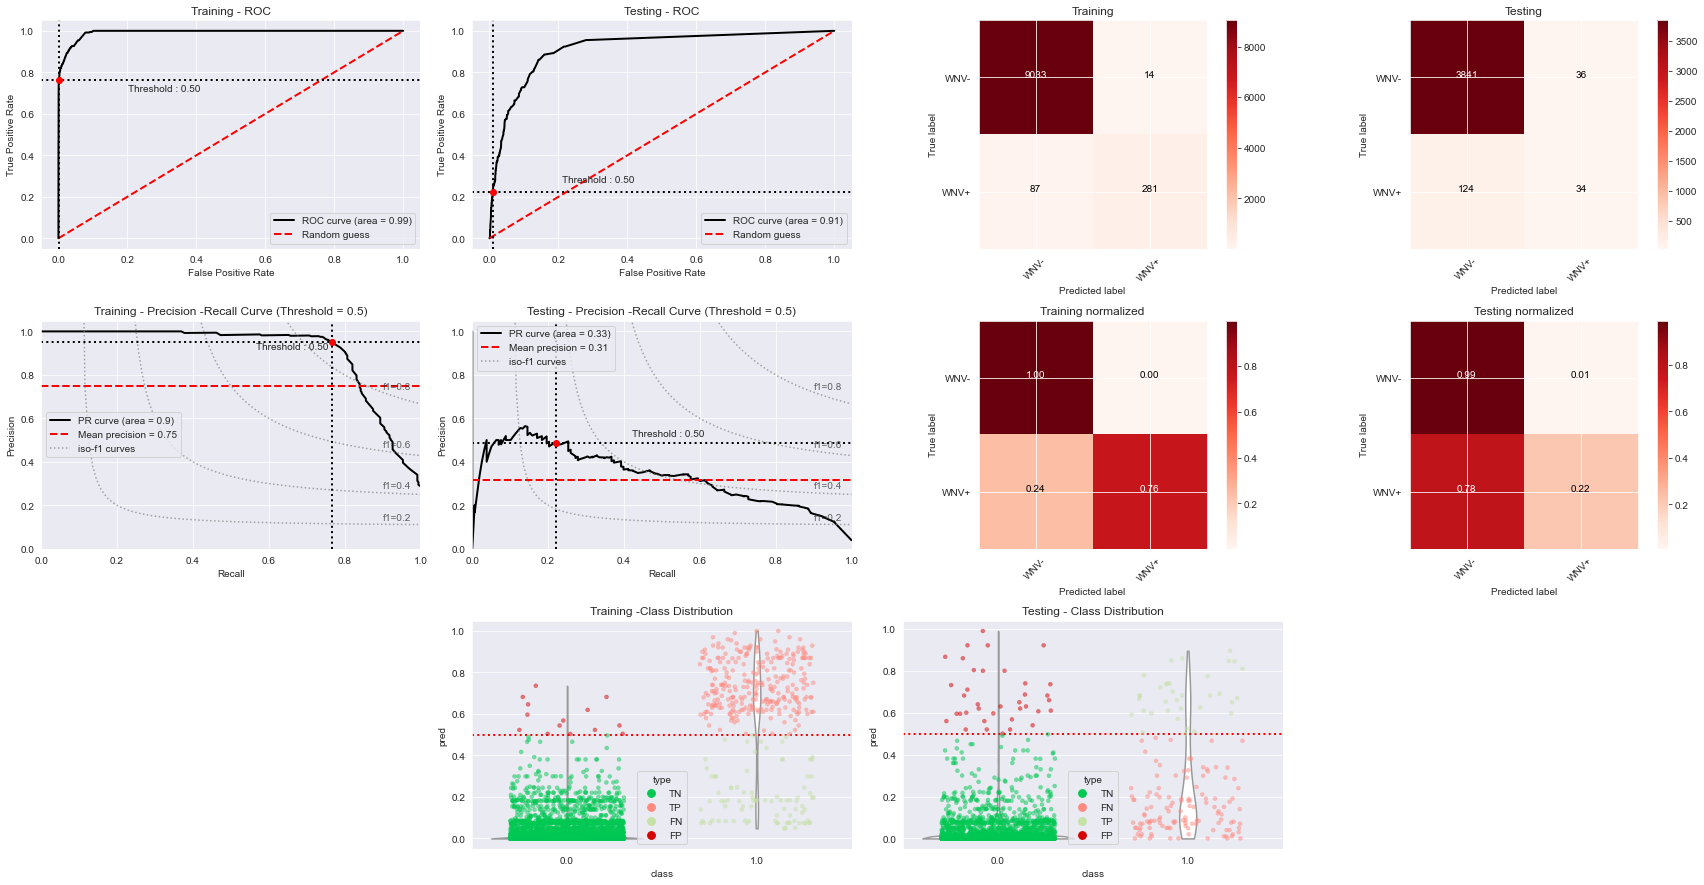

                   ________________________
                  |  Classification Report |
                   ‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾
              precision    recall  f1-score   support

        WNV-       0.99      1.00      0.99      9047
        WNV+       0.95      0.76      0.85       368

    accuracy                           0.99      9415
   macro avg       0.97      0.88      0.92      9415
weighted avg       0.99      0.99      0.99      9415



In [44]:
evaluation_plot(rf, prediction_list,proba_list)

In [45]:
gb = run_model('gb')

### METRICS ###


{'model': 'gb',
 'train_auc': 0.9558571842215291,
 'test_auc': 0.9180276084536197,
 'precision': 0.5588235294117647,
 'specificity': 0.9961310291462471,
 'recall': 0.12025316455696203,
 'f_score': 0.19791666666666666}

True Negatives: 3862
False Positives: 15
False Negatives: 139
True Positives: 19


In [46]:
prediction_list,proba_list= predictions(gb)

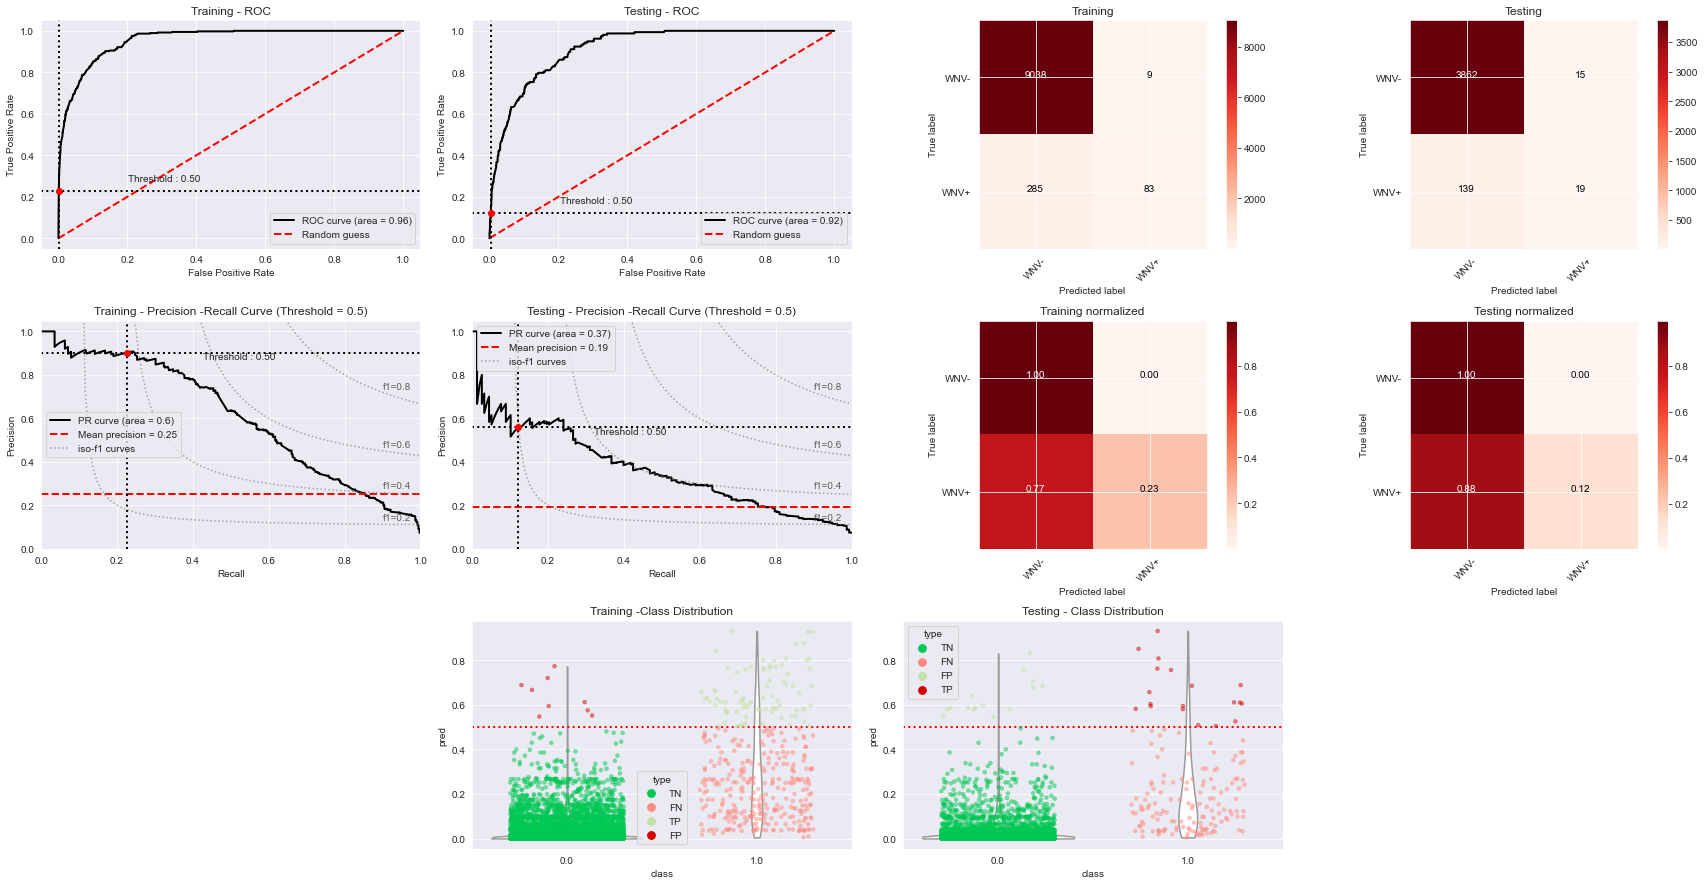

                   ________________________
                  |  Classification Report |
                   ‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾
              precision    recall  f1-score   support

        WNV-       0.97      1.00      0.98      9047
        WNV+       0.90      0.23      0.36       368

    accuracy                           0.97      9415
   macro avg       0.94      0.61      0.67      9415
weighted avg       0.97      0.97      0.96      9415



In [47]:
evaluation_plot(gb, prediction_list,proba_list)

In [48]:
dt = run_model('dt')

### METRICS ###


{'model': 'dt',
 'train_auc': 0.9952120508359725,
 'test_auc': 0.842008861085989,
 'precision': 0.6583333333333333,
 'specificity': 0.989424812999742,
 'recall': 0.5,
 'f_score': 0.5683453237410072}

True Negatives: 3836
False Positives: 41
False Negatives: 79
True Positives: 79


In [49]:
prediction_list,proba_list= predictions(dt)

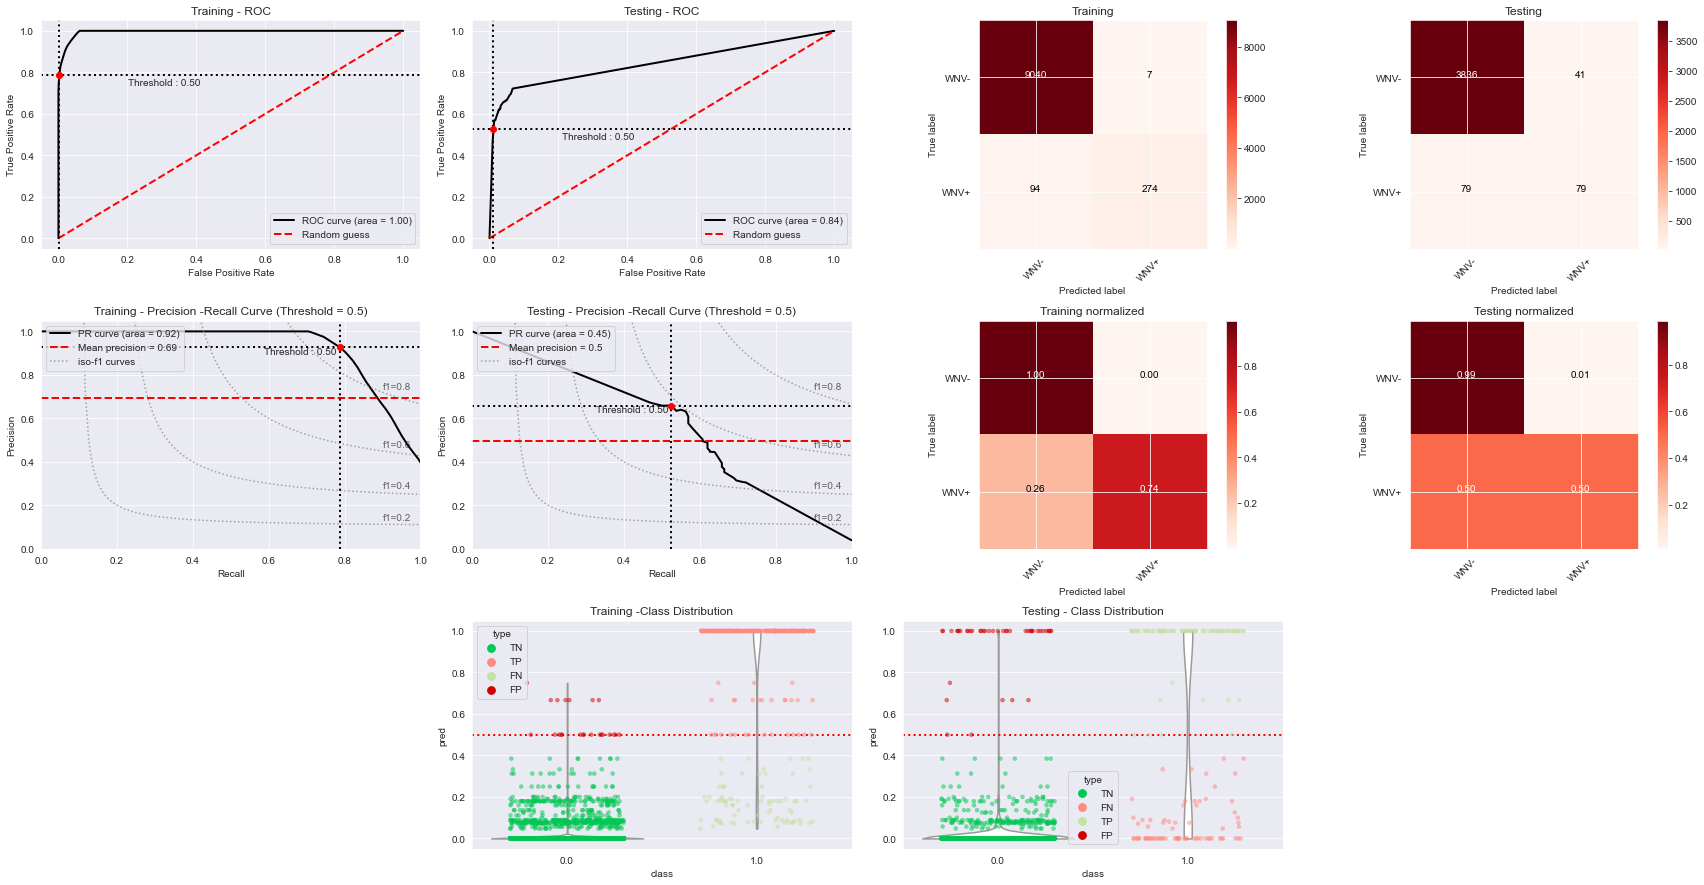

                   ________________________
                  |  Classification Report |
                   ‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾
              precision    recall  f1-score   support

        WNV-       0.99      1.00      0.99      9047
        WNV+       0.98      0.74      0.84       368

    accuracy                           0.99      9415
   macro avg       0.98      0.87      0.92      9415
weighted avg       0.99      0.99      0.99      9415



In [50]:
evaluation_plot(dt, prediction_list,proba_list)

In [51]:
et = run_model('et')

### METRICS ###


{'model': 'et',
 'train_auc': 0.9952120508359725,
 'test_auc': 0.9000050606791759,
 'precision': 0.4523809523809524,
 'specificity': 0.9881351560484911,
 'recall': 0.24050632911392406,
 'f_score': 0.3140495867768595}

True Negatives: 3831
False Positives: 46
False Negatives: 120
True Positives: 38


In [52]:
prediction_list,proba_list= predictions(et)

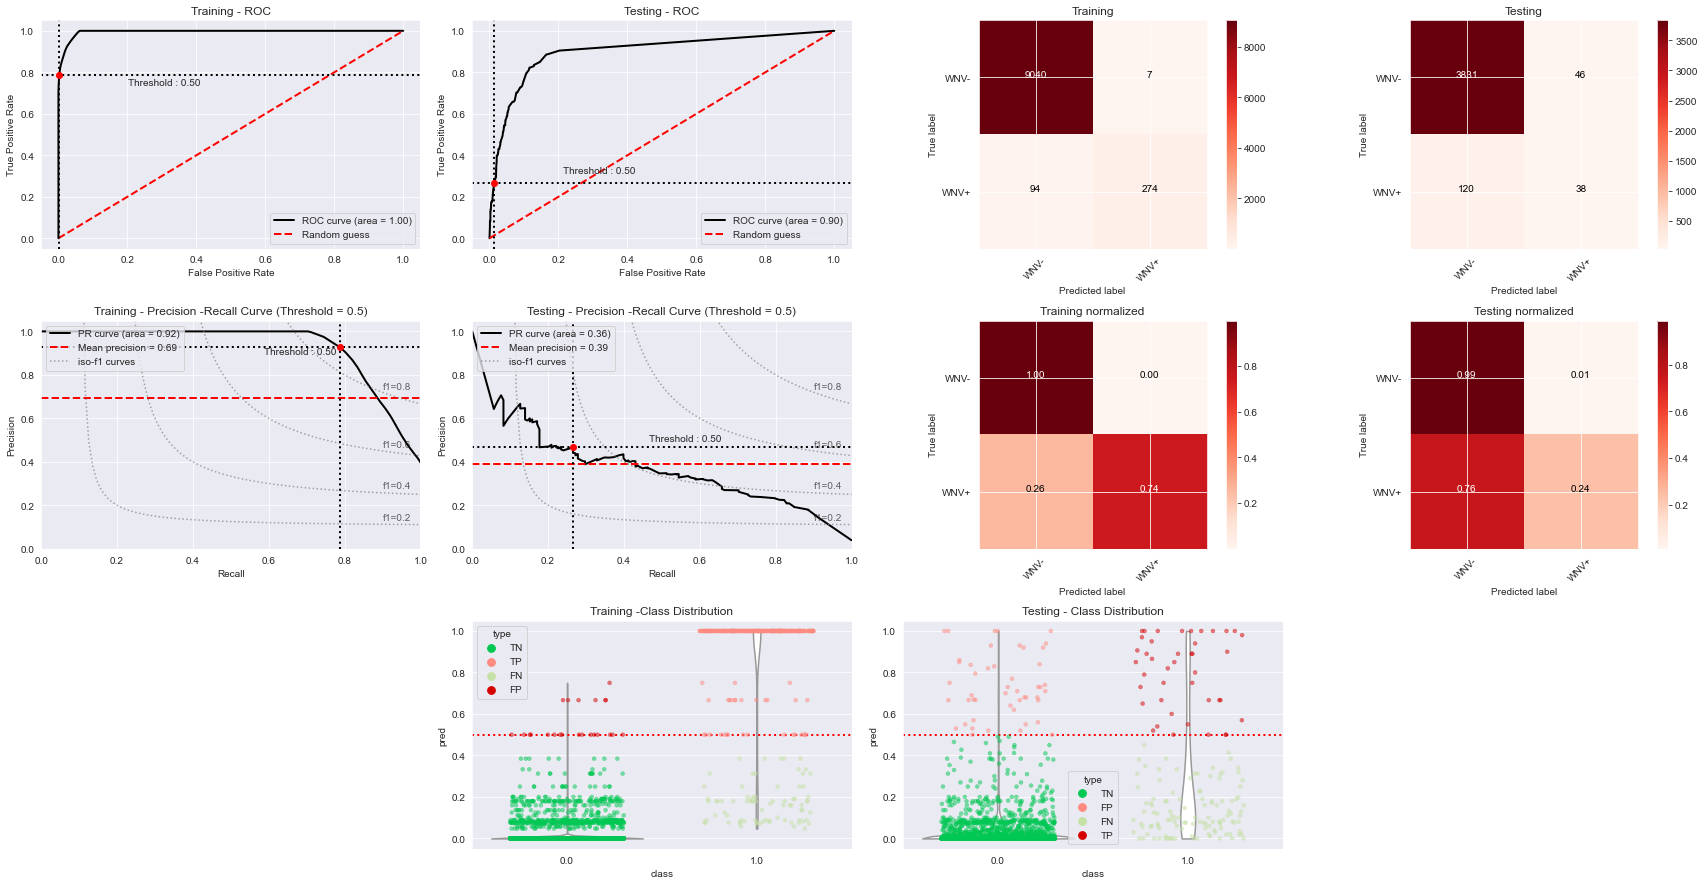

                   ________________________
                  |  Classification Report |
                   ‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾
              precision    recall  f1-score   support

        WNV-       0.99      1.00      0.99      9047
        WNV+       0.98      0.74      0.84       368

    accuracy                           0.99      9415
   macro avg       0.98      0.87      0.92      9415
weighted avg       0.99      0.99      0.99      9415



In [53]:
evaluation_plot(et, prediction_list,proba_list)

In [54]:
ada = run_model('ada')

### METRICS ###


{'model': 'ada',
 'train_auc': 0.9193339973375751,
 'test_auc': 0.8896559717646753,
 'precision': 0.3,
 'specificity': 0.9945834408047459,
 'recall': 0.056962025316455694,
 'f_score': 0.09574468085106382}

True Negatives: 3856
False Positives: 21
False Negatives: 149
True Positives: 9


In [55]:
prediction_list,proba_list= predictions(ada)

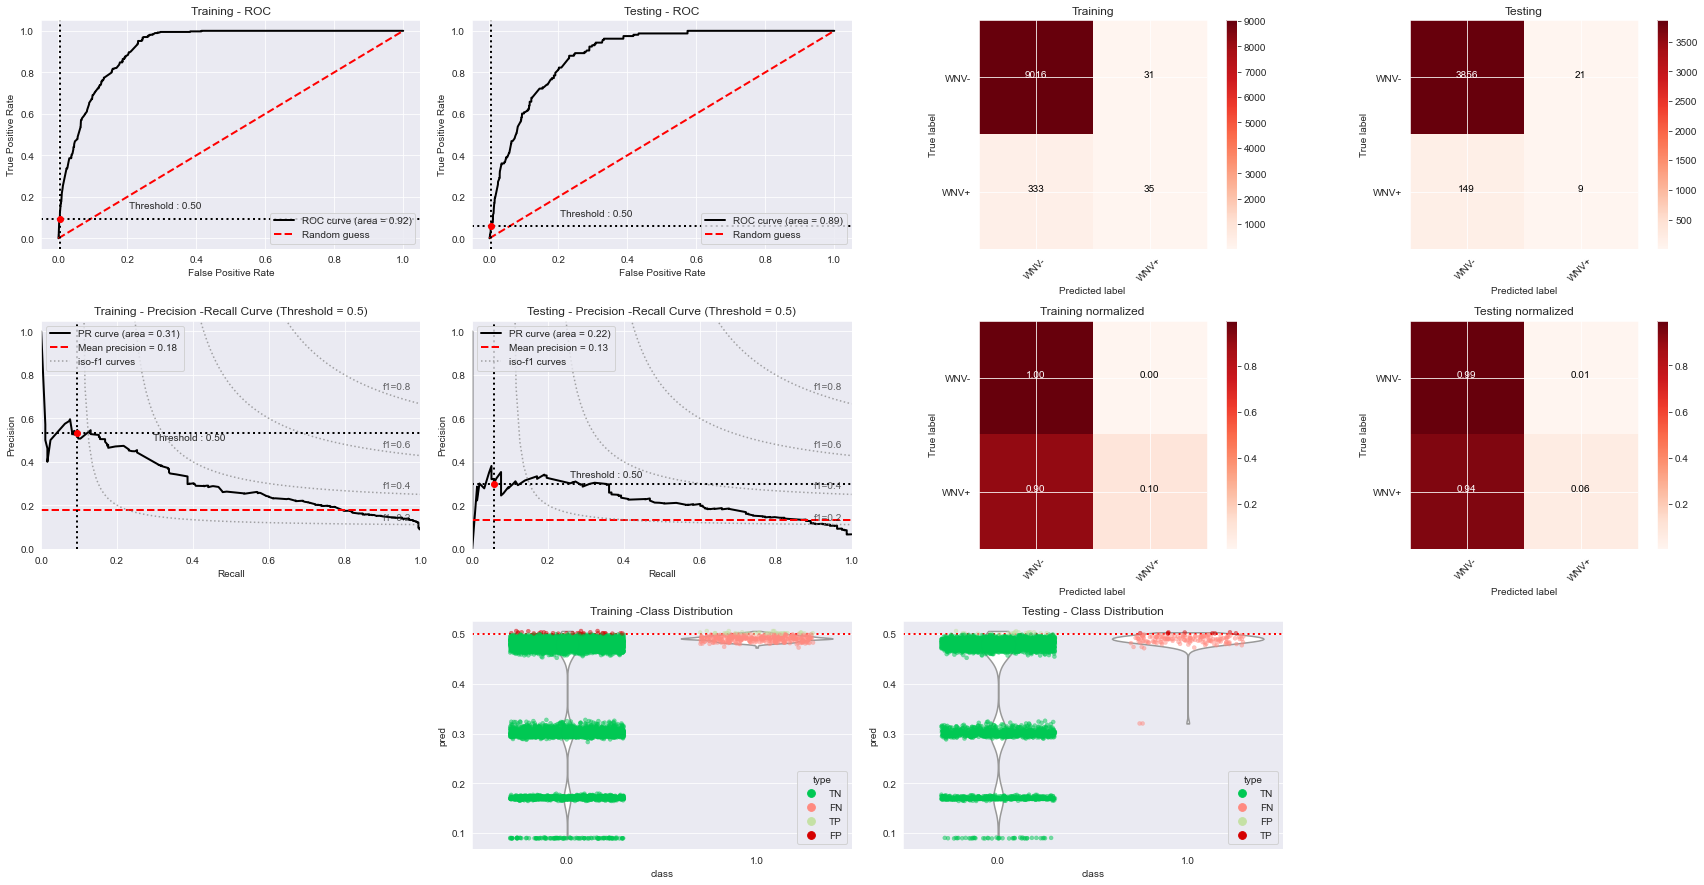

                   ________________________
                  |  Classification Report |
                   ‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾
              precision    recall  f1-score   support

        WNV-       0.96      1.00      0.98      9047
        WNV+       0.53      0.10      0.16       368

    accuracy                           0.96      9415
   macro avg       0.75      0.55      0.57      9415
weighted avg       0.95      0.96      0.95      9415



In [56]:
evaluation_plot(ada, prediction_list,proba_list)

In [57]:
svc = run_model('svc')

### METRICS ###


C:\Users\henri\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'model': 'svc',
 'train_auc': 0.955226420240195,
 'test_auc': 0.8753938351132775,
 'precision': 0.0,
 'specificity': 1.0,
 'recall': 0.0,
 'f_score': 0.0}

True Negatives: 3877
False Positives: 0
False Negatives: 158
True Positives: 0


In [58]:
prediction_list,proba_list= predictions(svc)

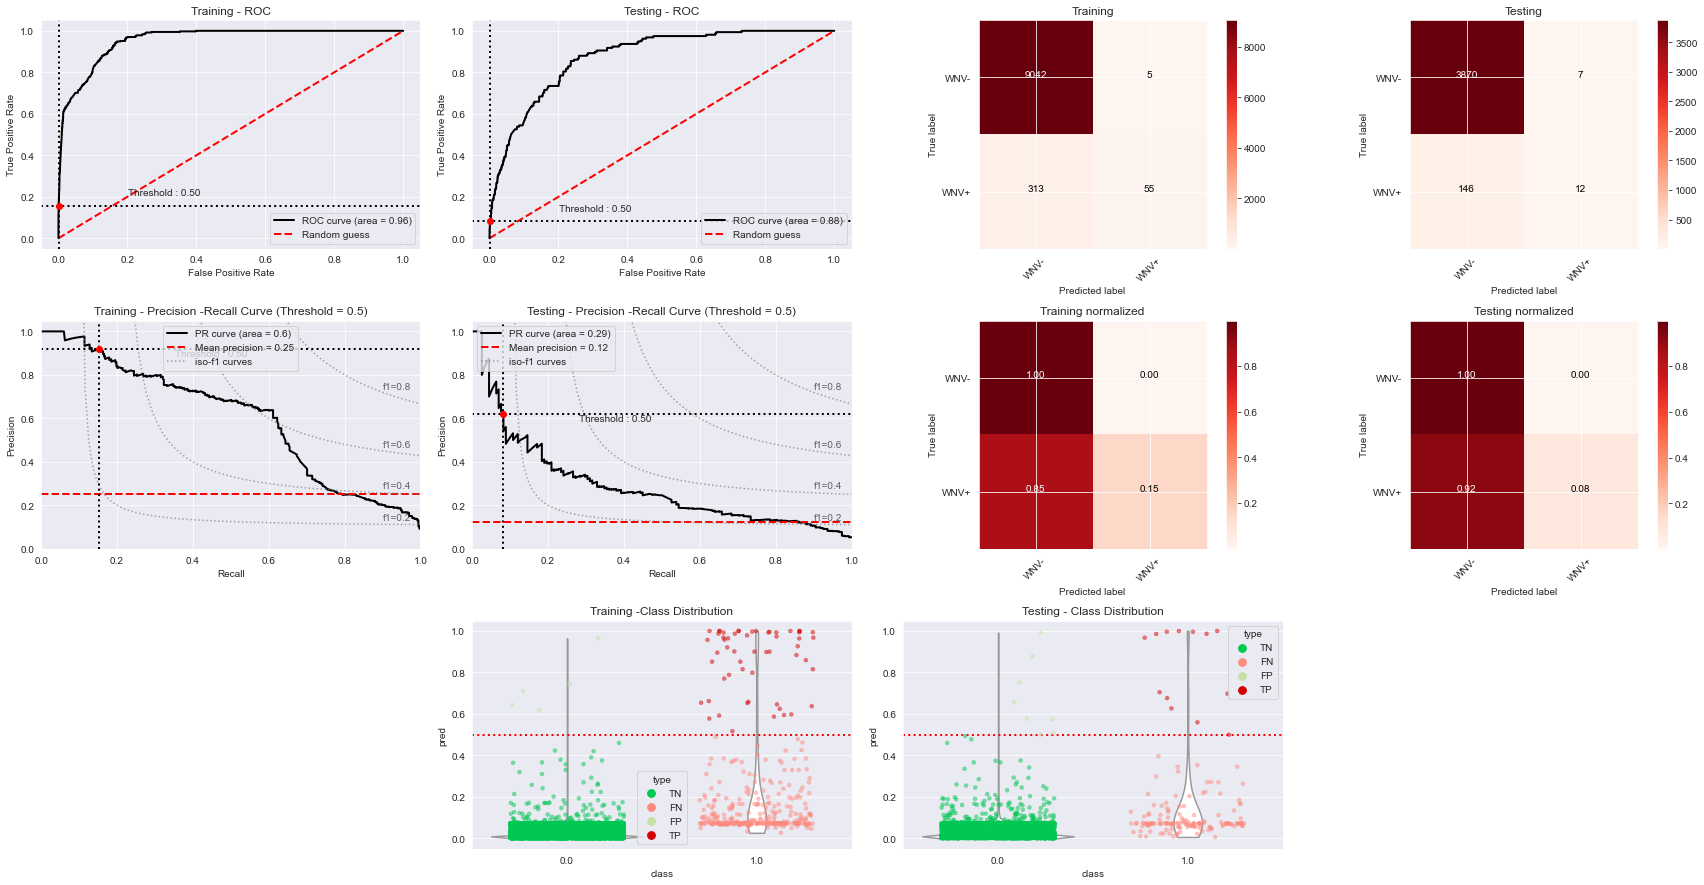

                   ________________________
                  |  Classification Report |
                   ‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾
              precision    recall  f1-score   support

        WNV-       0.97      1.00      0.98      9047
        WNV+       0.92      0.15      0.26       368

    accuracy                           0.97      9415
   macro avg       0.94      0.57      0.62      9415
weighted avg       0.96      0.97      0.95      9415



In [59]:
evaluation_plot(svc, prediction_list,proba_list)

In [60]:
# Results of our initial modelling
pd.DataFrame(init_list).sort_values(by='test_auc', ascending=False).reset_index(drop=True)

,model,train_auc,test_auc,precision,specificity,recall,f_score
0,gb,0.955857,0.918028,0.558824,0.996131,0.120253,0.197917
1,rf,0.992677,0.914648,0.485714,0.990714,0.215190,0.298246
2,et,0.995212,0.900005,0.452381,0.988135,0.240506,0.314050
3,ada,0.919334,0.889656,0.300000,0.994583,0.056962,0.095745
4,svc,0.955226,0.875394,0.000000,1.000000,0.000000,0.000000
5,lr,0.904231,0.863631,0.526316,0.997679,0.063291,0.112994
6,dt,0.995212,0.842009,0.658333,0.989425,0.500000,0.568345


In [61]:
init_dict = {
    lr: 'LogisticRegression',
    gb: 'GradientBoostingClassifier',
    ada: 'AdaBoostClassifier',
    rf: 'RandomForest',
    svc: 'SupportVectorMachineCl',
    et: 'ExtraTrees',
    dt: 'DecisionTreeClassifier',
}

In [62]:
def roc_curve_plotter(model_dict, plot_top=False):
    fig, ax = plt.subplots(1, 1, figsize=(12,10))
    axes = {}
    for i, m in enumerate(model_dict.keys()):
        axes[f'ax{i}'] = plot_roc_curve(m, X_test, y_test, ax=ax, name=model_dict[m])
    if plot_top:
        for i, a in enumerate(axes):
            if i != 0:
                axes[a].line_.set_color('lightgrey')
    plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--', label='Random Guess')
    plt.title('ROC-AUC Curve Comparison', fontsize=22)
    plt.xlabel('False Positive Rate', fontsize=12)
    plt.ylabel('True Positive Rate', fontsize=12)
    plt.legend(fontsize=12)

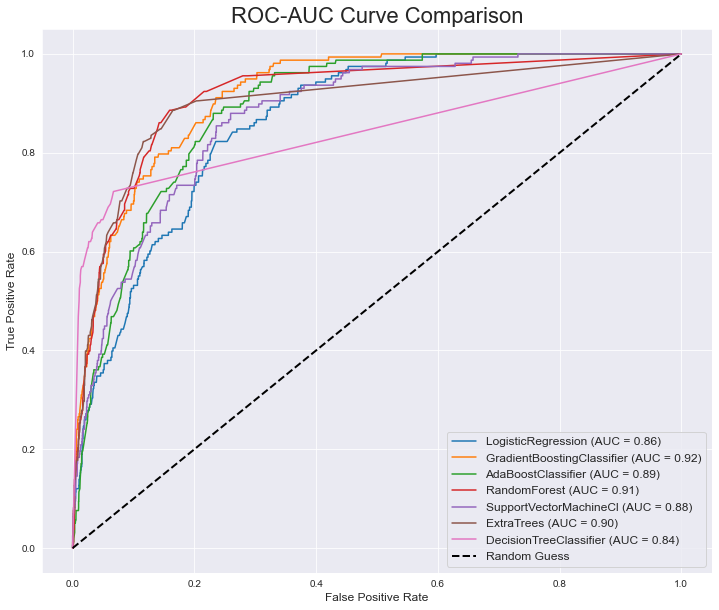

In [63]:
roc_curve_plotter(init_dict)